<a href="https://colab.research.google.com/github/somas1/CT/blob/main/Pandas/Pandas_II_Student_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Pandas - Joins, Time Series & Rolling Statistics, SQL

## Tasks Today:

1) <b>Pandas</b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) Joins <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - merge() <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Breaking Down the Inner Join <br>
 &nbsp;&nbsp;&nbsp;&nbsp; b) Outer Joins <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - Use Case Example <br>
 &nbsp;&nbsp;&nbsp;&nbsp; c) Rolling Statistics and Time Series w/Pandas <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - read_csv() <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; - shift() <br>
 2) <b> SQL </b> <br>
      - Adding DataFrame to Database Table
      - Reading SQL Query Result into DataFrame

In [1]:
import pandas as pd
import numpy as np

### Joins <br>
<p>Very often you will have to combine data from several different sources to obtain the actual dataset you need for your exploration or modeling. Pandas draws heavily on SQL in its API design for joins, and if you are familiar with SQL joins, then Pandas will come naturally. Imagine you have two tables, one with customer name and gender, and the other with their purchases:</p>

In [2]:
# Generate some fake data
city_data = {
    1: 'Chicago',
    2: 'Boston',
    3: 'New York',
    4: 'San Francisco',
    5: 'Washington D.C.'
}

ages = np.random.randint(18,65,100)
city = [ city_data[num] for num in np.random.randint(1,6,100)]
customer_id = np.arange(1000,1100)


<p>Let's assume we have a dataset containing the customer ID's cities, and ages for a set of customers. Suppose further, that we have a second table, containing some customer ID's, and a feedback survey rating from those customers. Suppose finally, that you as an analyst are asked the following question: What city tends to give the best feedback for our product? We'll need a join operation to get the answer.</p>

In [3]:
customer_demographics = pd.DataFrame.from_dict({
    'ages': ages,
    'city': city,
    'customer_id': customer_id
})

customer_demographics

,ages,city,customer_id
0,52,Washington D.C.,1000
1,63,San Francisco,1001
2,25,New York,1002
3,60,Washington D.C.,1003
4,45,New York,1004
...,...,...,...
95,37,New York,1095
96,48,Washington D.C.,1096
97,24,New York,1097
98,60,Chicago,1098


In [4]:
# Generate some other fake data
customer_id = np.random.randint(1000,1200,100)
customer_rating = np.random.randint(1,11,100)

surveys = pd.DataFrame.from_dict({
    'customer_id': customer_id,
    'customer_rating': customer_rating
})

surveys.head(20)

,customer_id,customer_rating
0,1159,1
1,1109,10
2,1026,3
3,1100,1
4,1156,6
5,1170,10
6,1192,8
7,1159,4
8,1086,5
9,1085,2


##### merge()

<p>We can zip the two dataframes up with an inner join, using the Pandas API as follows:</p>

In [5]:
demo_ratings = customer_demographics.merge(surveys, on = 'customer_id', how = 'inner')
demo_ratings

,ages,city,customer_id,customer_rating
0,63,San Francisco,1001,2
1,45,New York,1004,10
2,50,New York,1005,9
3,50,New York,1005,7
4,28,New York,1017,1
5,28,New York,1017,7
6,58,New York,1018,7
7,41,New York,1019,2
8,28,New York,1021,4
9,47,New York,1022,8


In [6]:
# drop duplicate customer_ids
demo_ratings_dropped = demo_ratings.drop_duplicates(subset = 'customer_id').reset_index(drop=True)
demo_ratings_dropped

,ages,city,customer_id,customer_rating
0,63,San Francisco,1001,2
1,45,New York,1004,10
2,50,New York,1005,9
3,28,New York,1017,1
4,58,New York,1018,7
5,41,New York,1019,2
6,28,New York,1021,4
7,47,New York,1022,8
8,63,Chicago,1025,2
9,21,Chicago,1026,3


**.join() method**

In [7]:
# join() is used to combine two DataFrames on the index but not on
# columns whereas merge() is primarily used to specify the columns
# you wanted to join on, this also supports joining on indexes and combination of index and columns

demo_surveys_join = customer_demographics.join(other = surveys.set_index('customer_id'), on = 'customer_id', how = 'inner')
demo_surveys_join

demo_surveys_join_nodups = demo_surveys_join.drop_duplicates(subset = 'customer_id').reset_index(drop = True)
demo_surveys_join_nodups

,ages,city,customer_id,customer_rating
0,63,San Francisco,1001,2
1,45,New York,1004,10
2,50,New York,1005,9
3,28,New York,1017,1
4,58,New York,1018,7
5,41,New York,1019,2
6,28,New York,1021,4
7,47,New York,1022,8
8,63,Chicago,1025,2
9,21,Chicago,1026,3


<p>Now it's a simple groupby operation to reveal the answer:</p>

In [8]:
 demo_ratings_dropped.groupby('city', as_index = False).mean().round(decimals = 2)[['city', 'ages', 'customer_rating']]

,city,ages,customer_rating
0,Boston,43.00,6.50
1,Chicago,44.25,5.38
2,New York,40.92,5.58
3,San Francisco,42.80,6.00
4,Washington D.C.,56.00,6.83


But what if we didn't drop the customer_id duplicates...would we get the same city result??

In [9]:
city_ages_ratings_dups = demo_ratings.groupby('city', as_index = False).mean().round(decimals = 2)[['city', 'ages', 'customer_rating']]
city_ages_ratings_dups

,city,ages,customer_rating
0,Boston,43.00,6.50
1,Chicago,44.25,5.38
2,New York,40.64,5.79
3,San Francisco,41.67,6.50
4,Washington D.C.,56.00,6.83


In [10]:
city_ages_ratings_dups.describe()

,ages,customer_rating
count,5.000000,5.000000
mean,45.112000,6.200000
std,6.236952,0.595273
min,40.640000,5.380000
25%,41.670000,5.790000
50%,43.000000,6.500000
75%,44.250000,6.500000
max,56.000000,6.830000


What would be the total mean for the US customers?


In [11]:
city_ratings_mean = demo_ratings_dropped.groupby('city').mean()
city_ratings_mean

,ages,customer_id,customer_rating
city,,,
Boston,43.000000,1063.250000,6.500000
Chicago,44.250000,1046.250000,5.375000
New York,40.916667,1036.000000,5.583333
San Francisco,42.800000,1053.400000,6.000000
Washington D.C.,56.000000,1064.333333,6.833333


In [ ]:
city_ratings_mean.loc['Boston']

ages                 44.500000
customer_id        1040.833333
customer_rating       5.333333
Name: Boston, dtype: float64

##### Breaking Down the Inner Join <br>
<p>Let's take a closer look at the actual mechanics here however. There is some subtlety and nuance that is best understood by thinking of an inner join as two steps: a cartesian product, and then a filter. Observe the result of the following inner join:</p>

In [12]:
d = {
    'A':[1,2,3,4,2],
    'B': ['a','b','c','d','x']
}

df1 = pd.DataFrame.from_dict(d)
df1

,A,B
0,1,a
1,2,b
2,3,c
3,4,d
4,2,x


In [15]:
d2 = {
    'A': [1,2,6,2,2],
    'C': ['e','f','g','h','y']
}
df2 = pd.DataFrame.from_dict(d2)
df2

,A,C
0,1,e
1,2,f
2,6,g
3,2,h
4,2,y


In [16]:
df1.merge(df2, on = 'A', how = 'inner')

,A,B,C
0,1,a,e
1,2,b,f
2,2,b,h
3,2,b,y
4,2,x,f
5,2,x,h
6,2,x,y


<p>Somehow, we ended up with more rows in the result than either of the original tables! This is because we joined on a $\textit{non-unique index}$. The join starts by computing all the possible combinations of rows, and then filters them based on the condition. Because of the duplicates, multiple combinations of rows make it through!</p>

### Outer Joins <br>
<p>An $\textit{outer join}$ produces all of the rows from the left table, and joins whatever rows it can to the right table, filling anywhere it cant with NaN's or None values. Below is a brief example, and then we will discuss a possible use case for this type of join.</p>

In [19]:
df3 = pd.DataFrame.from_dict({
    'A':[1,2,3],
    'B': ['a','b','c']
})

df4 = pd.DataFrame.from_dict({
    'A': [1],
    'C': ['d']
})

In [20]:
df3

,A,B
0,1,a
1,2,b
2,3,c


In [21]:
df4

,A,C
0,1,d


In [22]:
df3.merge(df4, on = 'A', how = 'outer')

,A,B,C
0,1,a,d
1,2,b,NaN
2,3,c,NaN


In [23]:
df3.merge(df4, on = 'A', how = 'inner')

,A,B,C
0,1,a,d


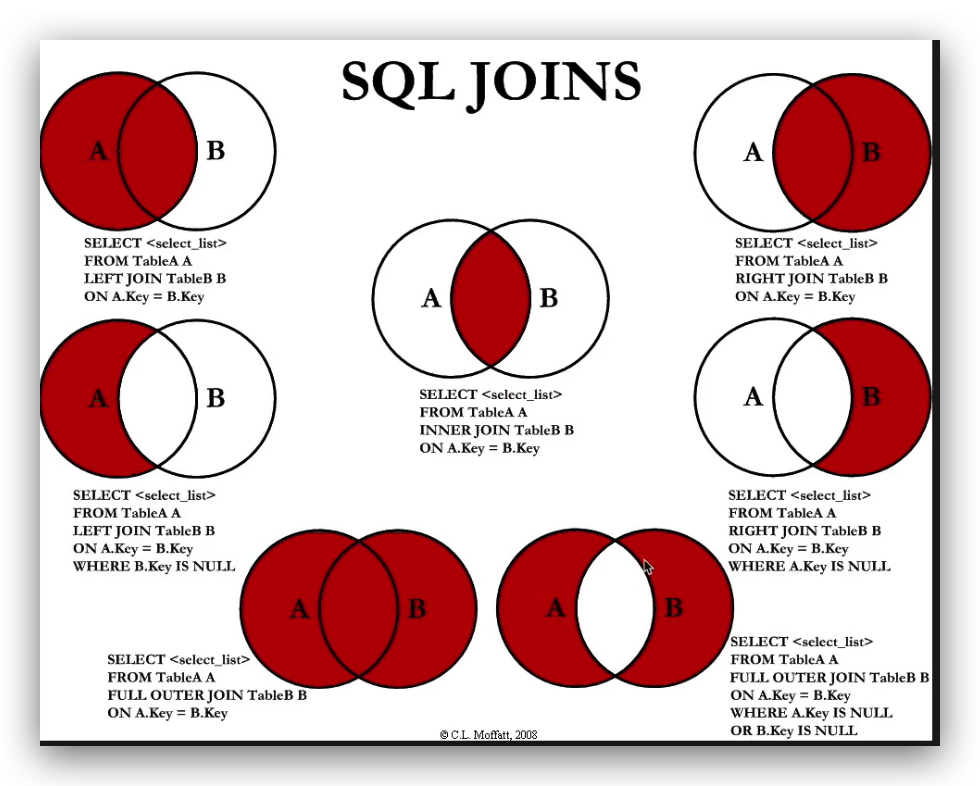

Inner Joins show only what both sides have in commmon. Outer Joins show everything from both sides and will either have blanks or extra filled in data.

In [24]:
# LEFT JOIN MERGE
df3.merge(df4, on = 'A', how = 'left')

,A,B,C
0,1,a,d
1,2,b,NaN
2,3,c,NaN


In [25]:
df1.merge(df2, on = 'A', how = 'left')

,A,B,C
0,1,a,e
1,2,b,f
2,2,b,h
3,2,b,y
4,3,c,NaN
5,4,d,NaN
6,2,x,f
7,2,x,h
8,2,x,y


In [26]:
# RIGHT JOIN MERGE
df3.merge(df4, on = 'A', how = 'right')

,A,B,C
0,1,a,d


In [27]:
df1.merge(df2, on = 'A', how = 'right')

,A,B,C
0,1,a,e
1,2,b,f
2,2,x,f
3,6,NaN,g
4,2,b,h
5,2,x,h
6,2,b,y
7,2,x,y


##### Use Case Example

<p>As an example use case, let's imagine we have again the demographics and survey response tables from above:</p>

In [28]:
customer_demographics.head()

,ages,city,customer_id
0,52,Washington D.C.,1000
1,63,San Francisco,1001
2,25,New York,1002
3,60,Washington D.C.,1003
4,45,New York,1004


In [29]:
surveys.head()

,customer_id,customer_rating
0,1159,1
1,1109,10
2,1026,3
3,1100,1
4,1156,6


<p>Now, you are asked as an analyst to compare the demographics of survey responders to the demographics of all your customers combined.</p>

In [31]:
demo_ratings_outer = customer_demographics.merge(surveys, on = 'customer_id', how = 'outer')
demo_ratings_outer

,ages,city,customer_id,customer_rating
0,52.0,Washington D.C.,1000,NaN
1,63.0,San Francisco,1001,2.0
2,25.0,New York,1002,NaN
3,60.0,Washington D.C.,1003,NaN
4,45.0,New York,1004,10.0
...,...,...,...,...
160,NaN,NaN,1152,6.0
161,NaN,NaN,1152,7.0
162,NaN,NaN,1144,8.0
163,NaN,NaN,1198,10.0


In [38]:
demo_ratings_outer['customer_rating'] = demo_ratings_outer['customer_rating'].fillna('N/A')
demo_ratings_outer.head(20)

pandas.core.frame.DataFrame

In [37]:
# Count all survey responders against the total number of customers we have
# (Specifically the customers that haven't taken the survey yet)
# .size() returns the number of rows if applied to a Series, otherwise it returns
# the number of rows times the number of columns if applied to a dataframe.
demo_size = demo_ratings_outer.groupby(['city', 'customer_rating']).size()
demo_size


city             customer_rating
Boston           2.0                 1
                 6.0                 1
                 8.0                 1
                 10.0                1
                 N/A                12
Chicago          1.0                 1
                 2.0                 1
                 3.0                 1
                 7.0                 3
                 8.0                 2
                 N/A                11
New York         1.0                 1
                 2.0                 2
                 3.0                 1
                 4.0                 1
                 5.0                 1
                 7.0                 4
                 8.0                 1
                 9.0                 2
                 10.0                1
                 N/A                16
San Francisco    2.0                 1
                 4.0                 1
                 6.0                 1
                 8.0           

In [40]:
# Producing similar result with .count()
demo_count = demo_ratings_outer.groupby(['city', 'customer_rating']).count()
demo_count

ages  customer_id
city            customer_rating                   
Boston          2.0                 1            1
                6.0                 1            1
                8.0                 1            1
                10.0                1            1
                N/A                12           12
Chicago         1.0                 1            1
                2.0                 1            1
                3.0                 1            1
                7.0                 3            3
                8.0                 2            2
                N/A                11           11
New York        1.0                 1            1
                2.0                 2            2
                3.0                 1            1
                4.0                 1            1
                5.0                 1            1
                7.0                 4            4
                8.0                 1            1
                9.0                 2            2
                10.0                1            1
                N/A                16           16
San Francisco   2.0                 1            1
                4.0                 1            1
                6.0                 1            1
                8.0                 1            1
                9.0                 1            1
                10.0                1            1
                N/A                 9            9
Washington D.C. 2.0                 1            1
                4.0                 1            1
                5.0                 1            1
                10.0                3            3
                N/A                17           17

In [48]:
# average age of people that answered the survey
survey_answered = demo_ratings_outer[demo_ratings_outer['customer_rating'] != 'N/A']
round(survey_answered['ages'].mean())
# demo_ratings_outer['customer_rating'] != 'N/A'


44

In [ ]:
# find the average age of people that did not answer the survey


### Rolling Statistics and Time Series with Pandas

##### read_csv()

##### shift() <br>
<p>Shift index by desired number of periods with an optional time freq</p>

In [ ]:
# Print all keys for easier use


In [ ]:
# create a new column that takes the difference in temperature from the previous day as an absolute value


In [ ]:
# Pip install for both psycopg2 and SQLAlchemy
import sys
!{sys.executable} -m pip install psycopg2-binary SQLAlchemy # the -binary is for mac users

In [ ]:
# databaselanguage(postgresql)://user:password@url:port/database_name



In [ ]:
# Writing a DataFrame to PostGreSQL database
# from sqlalchemy.types import Integer, Text,String,DateTime,Float
